In [6]:
import numpy as np
import matplotlib.pyplot as plt

% matplotlib inline

In [32]:
def loadDataSet():
    dataMat = []
    labelArr = []
    
    filename = "data/horseColic/testSet.txt"
    fr = open(filename)
    for line in fr.readlines():
        lineList = line.strip().split('\t')
        lineFeatList = [float(x) for x in lineList[0:-1]]
        lineFeatList = [1] + lineFeatList
        dataMat.append(lineFeatList)
        labelArr.append(int(lineList[-1]))
    
    return dataMat, labelArr

def sigmoid(inX):
    return 1.0 / (1 + np.exp(-inX))

### batch gradient ascending
def gradAscent(dataMatIn, labelArrIn):
    dataMatrix = np.mat(dataMatIn)
    labelMatrix = np.mat(labelArrIn).transpose()
    m,n = np.shape(dataMatrix)
    alpha = 0.01
    maxCycles = 500
    weights = np.ones((n, 1))
    weightMat = []
    for k in range(maxCycles):
        h = sigmoid(dataMatrix*weights)
        error = (labelMatrix - h)
        weights = weights + alpha * dataMatrix.transpose()*error
        weightMat.append(list(np.array(weights)[:,0]))
        
    return np.array(weights)[:,0], np.array(weightMat)

def plotBestFit(weights):
    dataMat, labels = loadDataSet()
    dataMat = np.array(dataMat)
    labels = np.array(labels, dtype=int)
    labelsUnique = np.unique(labels)
    plt.figure()
    colors = ['r', 'g']
    for iLabel in labelsUnique:
        plt.scatter(dataMat[labels==iLabel,1], dataMat[labels==iLabel, 2], c = colors[iLabel], label = "class{}".format(iLabel))
    
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend(loc='right', bbox_to_anchor=(1.3, 0.5))
    
    x = np.arange(-3.0, 3.0, 0.1)
    y = np.array((-weights[0] - weights[1]*x) / weights[2])
    plt.plot(x,y)

In [33]:
dataMat, labelArr = loadDataSet()
print(dataMat[:10])
print(labelArr[:10])

[[1, -0.017612, 14.053064], [1, -1.395634, 4.662541], [1, -0.752157, 6.53862], [1, -1.322371, 7.152853], [1, 0.423363, 11.054677], [1, 0.406704, 7.067335], [1, 0.667394, 12.741452], [1, -2.46015, 6.866805], [1, 0.569411, 9.548755], [1, -0.026632, 10.427743]]
[0, 1, 0, 0, 0, 1, 0, 1, 0, 0]


[ 12.78439308   1.11820761  -1.7408268 ]


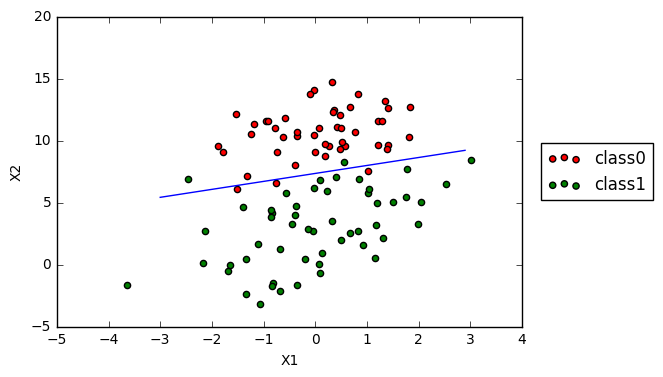

In [34]:
weights, weightMat = gradAscent(dataMat,labelArr)
print(weights)
plotBestFit(weights)

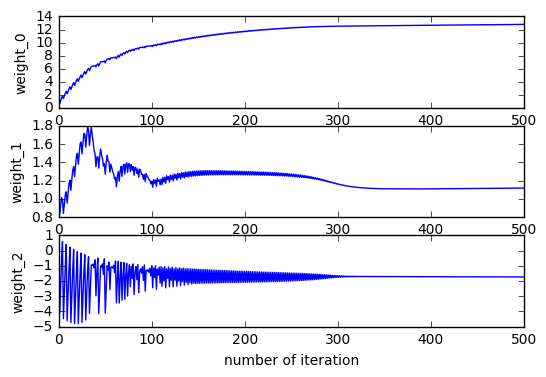

In [35]:
plt.figure()

x = range(1,len(weightMat)+1)
plt.subplot(311)
plt.plot(x, weightMat[:,0])
plt.ylabel("weight_0")
plt.subplot(312)
plt.plot(x, weightMat[:,1])
plt.ylabel("weight_1")
plt.subplot(313)
plt.plot(x, weightMat[:,2])
plt.ylabel("weight_2")
plt.xlabel("number of iteration")

## stochastic gradient ascending

In [36]:
def stochGradAscend(dataMat, labels):
    m, n = np.shape(dataMat)
    alpha = 0.01
    weights = np.ones(n)
    weightMat = []
    for i in range(m):
        curDataArr = np.array(dataMat[i])
        h = sigmoid( np.sum(curDataArr* weights))
        error = labels[i] - h
        weights = weights + alpha*error*curDataArr
        weightMat.append(weights)
    return weights, np.array(weightMat)

[[1, -0.017612, 14.053064], [1, -1.395634, 4.662541], [1, -0.752157, 6.53862], [1, -1.322371, 7.152853], [1, 0.423363, 11.054677], [1, 0.406704, 7.067335], [1, 0.667394, 12.741452], [1, -2.46015, 6.866805], [1, 0.569411, 9.548755], [1, -0.026632, 10.427743]]
[0, 1, 0, 0, 0, 1, 0, 1, 0, 0]


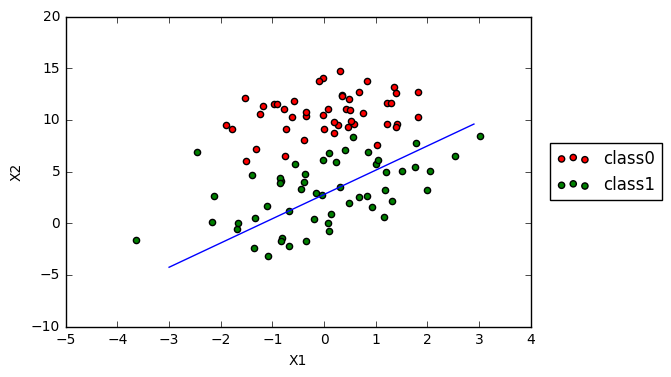

In [37]:
dataMat, labelArr = loadDataSet()
print(dataMat[:10])
print(labelArr[:10])
weights, weightMat = stochGradAscend(dataMat, labelArr)
plotBestFit(weights)

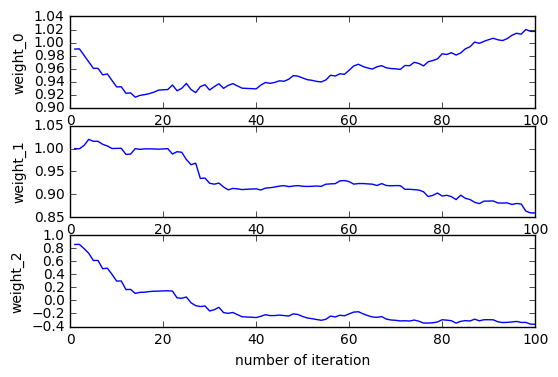

In [38]:
plt.figure()

x = range(1, len(weightMat)+1)
plt.subplot(311)
plt.plot(x, weightMat[:,0])
plt.ylabel("weight_0")
plt.subplot(312)
plt.plot(x, weightMat[:,1])
plt.ylabel("weight_1")
plt.subplot(313)
plt.plot(x, weightMat[:,2])
plt.ylabel("weight_2")
plt.xlabel("number of iteration")

## improvement stochastic grandient ascending

In [39]:
def stocGradAscentAdapt(dataMatr, labels, numIter = 150):
    m, n = np.shape(dataMatr)
    weightMat = []
    weights = np.ones(n)
    for j in range(numIter):
        dataIndexs = range(m)
        for i in range(m):
            alpha = 1 / (1.0+j+i) + 0.01  # adjust alpha with iteration
            randIndex = int(np.random.uniform(0, len(dataIndexs)))
            curDataArry = np.array( dataMatr[dataIndexs[randIndex]] )
            curLabel = labels[dataIndexs[randIndex]]
            h = sigmoid(np.sum(curDataArry * weights))
            error = curLabel - h
            weights = weights + alpha * error * curDataArry
            weightMat.append(weights)
            del (dataIndexs[randIndex])
    return weights, np.array(weightMat)

[[1, -0.017612, 14.053064], [1, -1.395634, 4.662541], [1, -0.752157, 6.53862], [1, -1.322371, 7.152853], [1, 0.423363, 11.054677], [1, 0.406704, 7.067335], [1, 0.667394, 12.741452], [1, -2.46015, 6.866805], [1, 0.569411, 9.548755], [1, -0.026632, 10.427743]]
[0, 1, 0, 0, 0, 1, 0, 1, 0, 0]


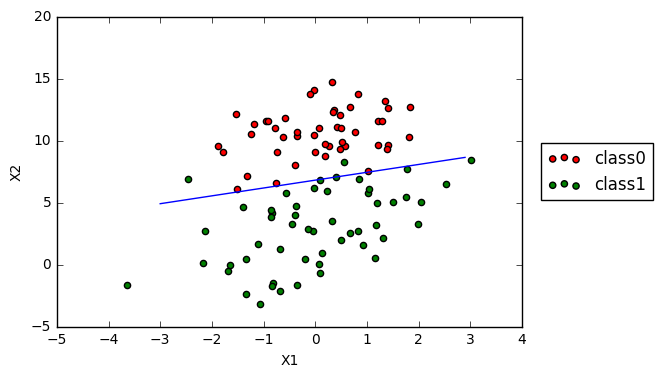

In [40]:
dataMat, labelArr = loadDataSet()
print(dataMat[:10])
print(labelArr[:10])
weights, weightMat = stocGradAscentAdapt(dataMat, labelArr)
plotBestFit(weights)

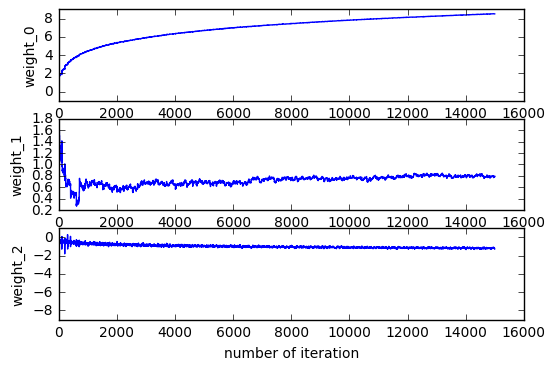

In [41]:
plt.figure()

x = range(1, len(weightMat)+1)
plt.subplot(311)
plt.plot(x, weightMat[:,0])
plt.ylabel("weight_0")

plt.subplot(312)
plt.plot(x, weightMat[:,1])
plt.ylabel("weight_1")

plt.subplot(313)
plt.plot(x, weightMat[:,2])
plt.ylabel("weight_2")

plt.xlabel("number of iteration")

# A real case : horseColic

In [42]:
def classify(inX, weights):
    prob = sigmoid( np.sum(inX*weights))
    if prob >= 0.5:
        return 1.0
    else:
        return 0.0

def colicTest():
    frTrain = open("data/horseColic/horseColicTraining.txt")
    frTest = open("data/horseColic/horseColicTest.txt")
    
    trainSet = []
    trainLabels = []
    for line in frTrain.readlines():
        curLine = line.strip().split('\t')
        lineArr = [float(curLine[i]) for i in range(21)] # 21 features
        trainSet.append(lineArr)
        trainLabels.append(float(curLine[21]))
#     print("train size: ", np.shape(trainSet))
#     print(trainSet[:5])
#     print(trainLabels[:5])
    trainWeights, trainWeightMatr = stocGradAscentAdapt(trainSet, trainLabels)
    errorCount = 0.0
    numTest = 0.0
    for line in frTest.readlines():
        numTest += 1
        curLine = line.strip().split('\t')
        lineArr = np.array([float(curLine[i]) for i in range(21)])
        realLabel = float(curLine[21])
        preLabel = classify(lineArr, trainWeights)
        if preLabel != realLabel:
            errorCount += 1
    
    errorRate = errorCount / numTest
    print("the error rate is : {}".format(errorRate))
    
    return errorRate, trainWeights, trainWeightMatr

In [43]:
errorRate, weights, weighMat =  colicTest()

/opt/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:17: RuntimeWarning: overflow encountered in exp


the error rate is : 0.417910447761


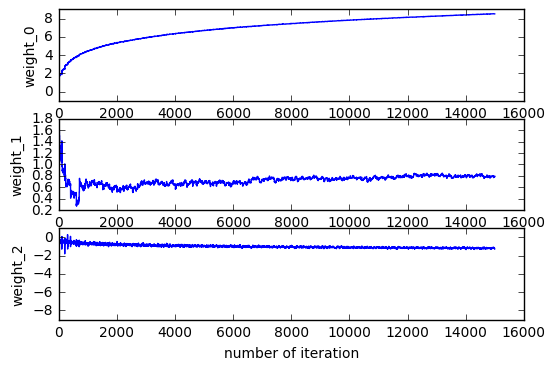

In [44]:
plt.figure()

x = range(1, len(weightMat)+1)

plt.subplot(311)
plt.plot(x, weightMat[:,0])
plt.ylabel("weight_0")

plt.subplot(312)
plt.plot(x, weightMat[:,1])
plt.ylabel("weight_1")

plt.subplot(313)
plt.plot(x, weightMat[:,2])
plt.ylabel("weight_2")

plt.xlabel("number of iteration")

In [10]:
test2[0:-1]

[0, 1]